# Pandas, Matplotlib and Seaborn

In [1]:
import pandas as pd

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

In [7]:
df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

# EDA (Exploratory Data Analysis)

### EDA

In [11]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [13]:
df.describe()

,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
count,223.000,223.000,223.000,223.000,223.000
mean,15351.632,1787.099,18927.417,1957.278,17767.305
std,22550.899,650.696,29103.565,353.146,28698.104
min,0.000,0.000,0.000,0.000,0.000
25%,1406.500,2023.000,2273.500,2021.000,2039.000
50%,5421.000,2023.000,6805.000,2021.000,6396.000
75%,19697.000,2023.000,23715.000,2021.000,20740.000
max,132372.000,2023.000,234316.000,2021.000,234317.000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 1 to 223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Territory   223 non-null    object
 1   UN_Region           223 non-null    object
 2   IMF_Estimate        223 non-null    int64 
 3   IMF_Year            223 non-null    int64 
 4   WorldBank_Estimate  223 non-null    int64 
 5   WorldBank_Year      223 non-null    int64 
 6   UN_Estimate         223 non-null    int64 
 7   UN_Year             223 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.7+ KB


In [19]:
df.shape

(223, 8)

In [23]:
df.isnull().sum()

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

## Which countries below average by IMF world estimate?

In [28]:
df.columns

Index(['Country/Territory', 'UN_Region', 'IMF_Estimate', 'IMF_Year',
       'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year'],
      dtype='object')

In [31]:
df["IMF_Estimate"].mean()

15351.632286995517

In [131]:
#df[df["IMF_Estimate"]<15351.632286995517]
df[df["IMF_Estimate"]<df["IMF_Estimate"].mean()].head(10)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
19,Greenland,Americas,0,0,54571,2020,58185,2021
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
37,US Virgin Islands,Americas,0,0,39552,2020,0,0


In [137]:
#df["IMF_Estimate"].count(axis=0)
df.count(axis=0)

Country/Territory     223
UN_Region             223
IMF_Estimate          223
IMF_Year              223
WorldBank_Estimate    223
WorldBank_Year        223
UN_Estimate           223
UN_Year               223
dtype: int64

In [139]:
df["IMF_Estimate"].eq(0).sum()
#count the no of zeros in particular column

26

In [167]:
#df["IMF_Year"].eq(0)
df.query("IMF_Year == 0")
#df.query("IMF_Year == 0")["Country/Territory"]
#df.loc[df["IMF_Year"] == 0, "Country/Territory"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
19,Greenland,Americas,0,0,54571,2020,58185,2021
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
37,US Virgin Islands,Americas,0,0,39552,2020,0,0


## Which country has highest UN Estimate?

In [ ]:
df[df["Country/Territory"]

In [38]:
df["UN_Estimate"].max()

234317

In [173]:
#df.loc["UN_Estimate"==234317]
df[df["UN_Estimate"] == 234317]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021


In [43]:
df.groupby(["Country/Territory"])["UN_Estimate"].max().sort_values(ascending=False).head(1)

Country/Territory
Monaco    234317
Name: UN_Estimate, dtype: int64

## Which country has highest Worldbank Estimate?

In [45]:
df.groupby(["Country/Territory"])["WorldBank_Estimate"].max().sort_values(ascending=False).head(1)

Country/Territory
Monaco    234316
Name: WorldBank_Estimate, dtype: int64

## Which country has highest IMF Estimate?

In [47]:
df.groupby(["Country/Territory"])["IMF_Estimate"].max().sort_values(ascending=False).head(1)

Country/Territory
Luxembourg    132372
Name: IMF_Estimate, dtype: int64

## Checking Missing Values

In [49]:
df.isnull().sum()

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

## Visualization

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

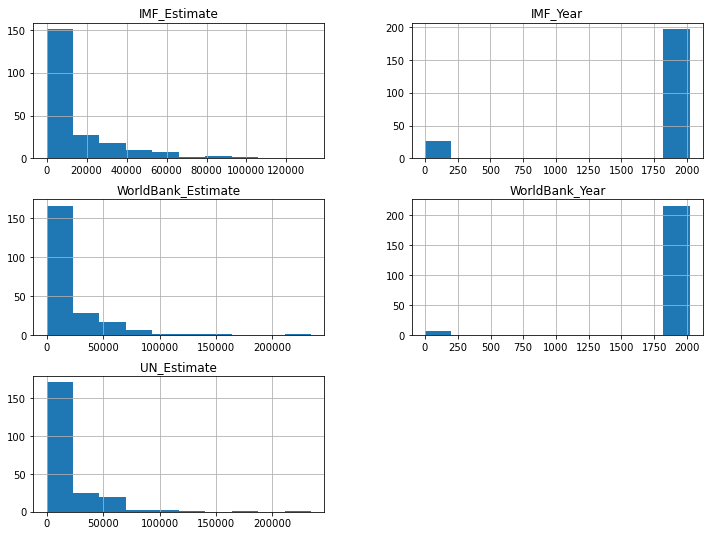

In [54]:
df.hist(figsize=(12,9))
plt.show()

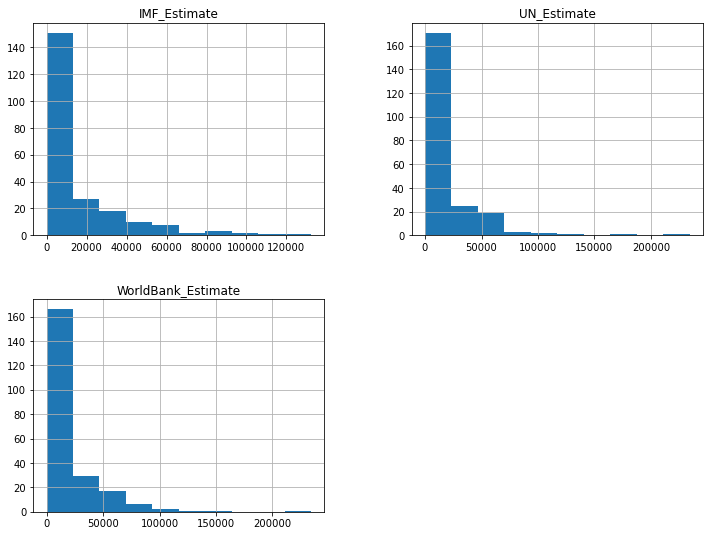

In [57]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()

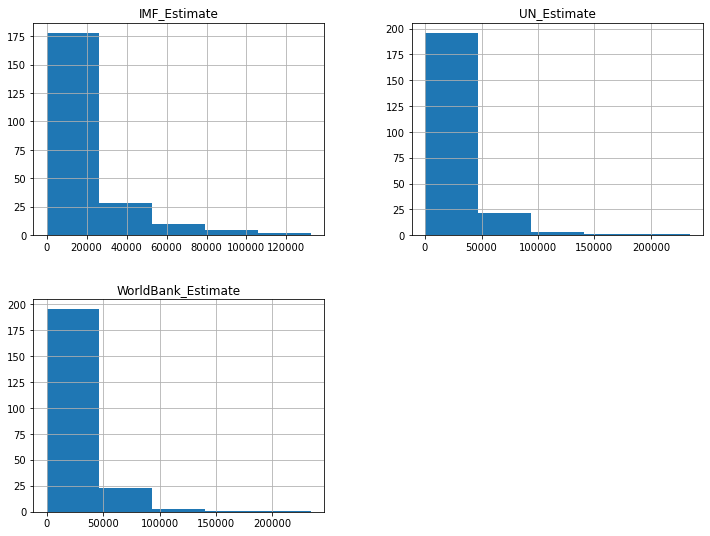

In [59]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9))

plt.show()

In [61]:
df["WorldBank_Estimate"].agg(["min","max"])

min         0
max    234316
Name: WorldBank_Estimate, dtype: int64

In [63]:
234316/5
#1 bin size if bins=5

46863.2

In [65]:
234316/10
#1 bin size if bins not given any number

23431.6

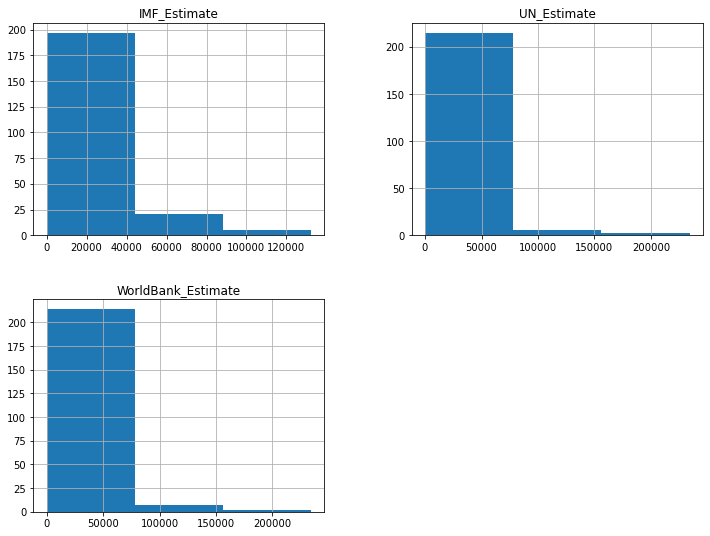

In [67]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

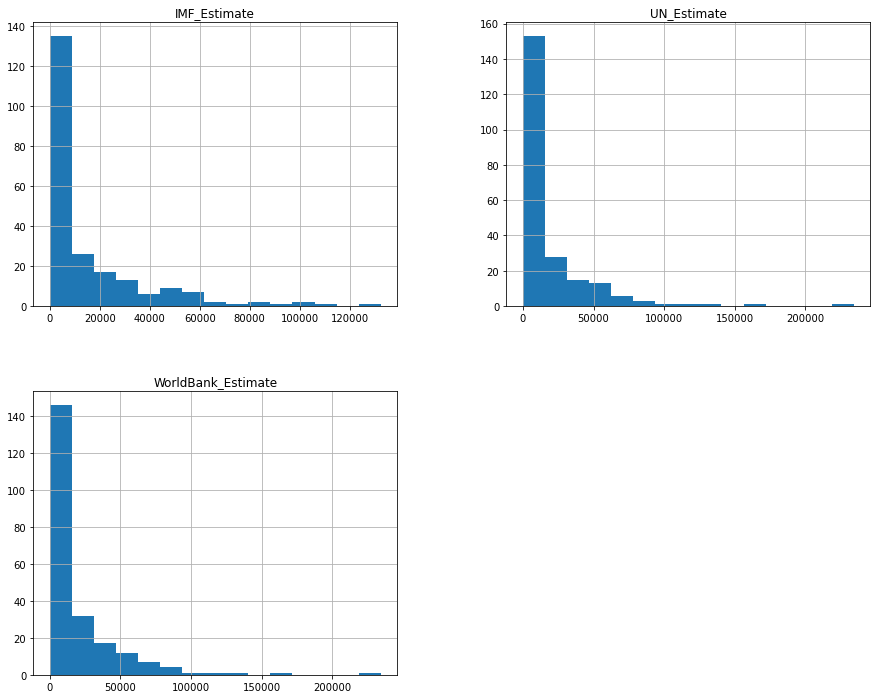

In [69]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=15, figsize=(15,12))


plt.show()

In [175]:
df[df["IMF_Estimate"]<10000].count()

Country/Territory     140
UN_Region             140
IMF_Estimate          140
IMF_Year              140
WorldBank_Estimate    140
WorldBank_Year        140
UN_Estimate           140
UN_Year               140
dtype: int64

### Correlation Heatmap

In [71]:
df.corr()

,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
IMF_Estimate,1.000,0.248,0.588,0.085,0.627
IMF_Year,0.248,1.000,-0.317,0.416,-0.211
WorldBank_Estimate,0.588,-0.317,1.000,0.117,0.930
WorldBank_Year,0.085,0.416,0.117,1.000,0.017
UN_Estimate,0.627,-0.211,0.930,0.017,1.000


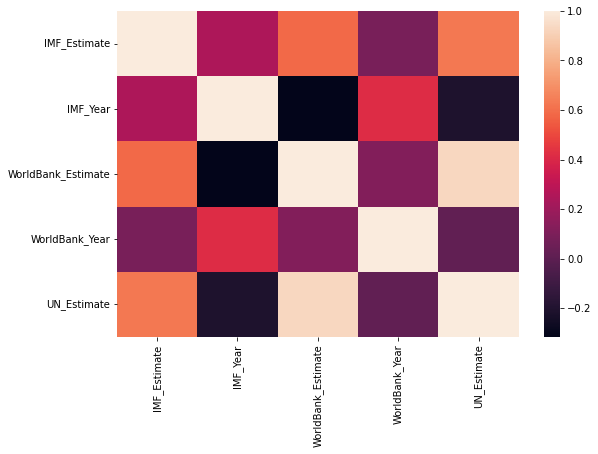

In [73]:
corr = df.corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

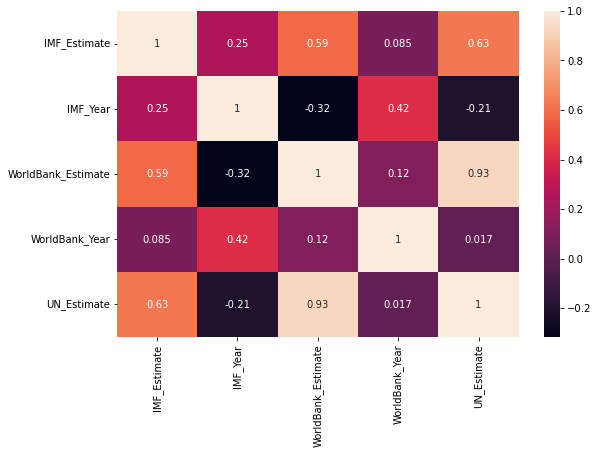

In [75]:
corr = df.corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True)

plt.show()

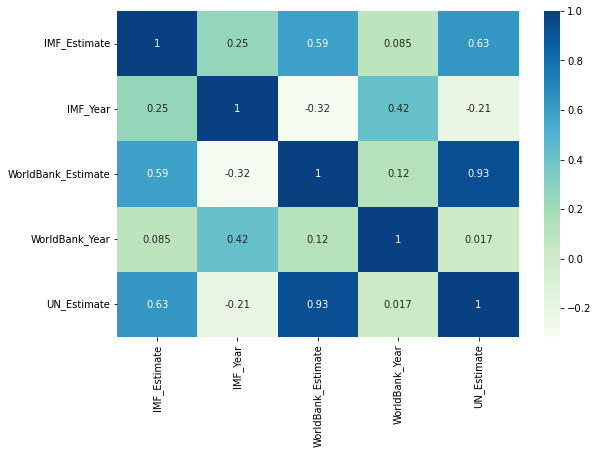

In [77]:
corr = df.corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'GnBu')

plt.show()

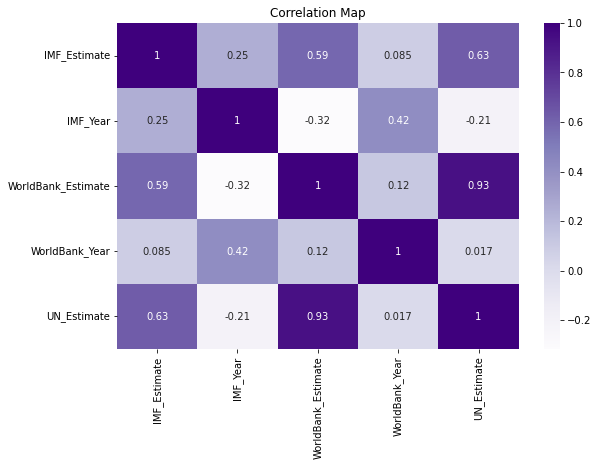

In [79]:
corr = df.corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.title("Correlation Map")


plt.show()

### Bar plot

In [81]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


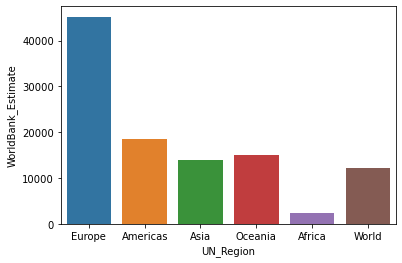

In [83]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, ci=None)

plt.show()

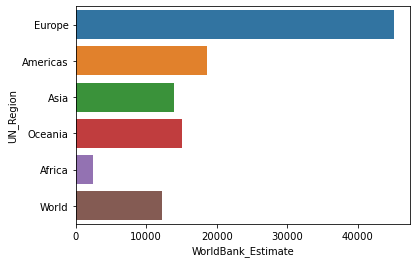

In [85]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, ci=None)

plt.show()

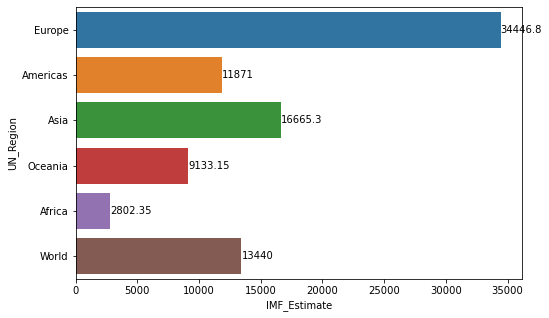

In [87]:
fig = plt.figure(figsize = (8,5))

ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",  
data = df, ci = None)

ax.bar_label(ax.containers[0])

plt.show()

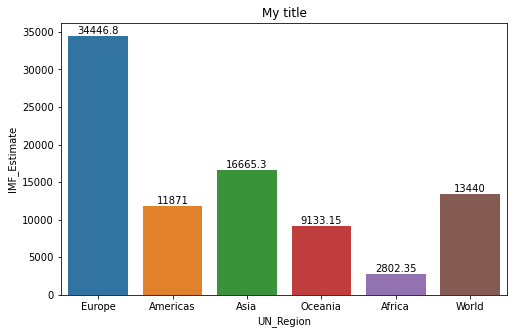

In [89]:
fig = plt.figure(figsize = (8,5)) 
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate", 
                 data = df, ci = None) 

ax.bar_label(ax.containers[0]) 


ax.set_title("My title")
plt.show()

### Scatter Plot

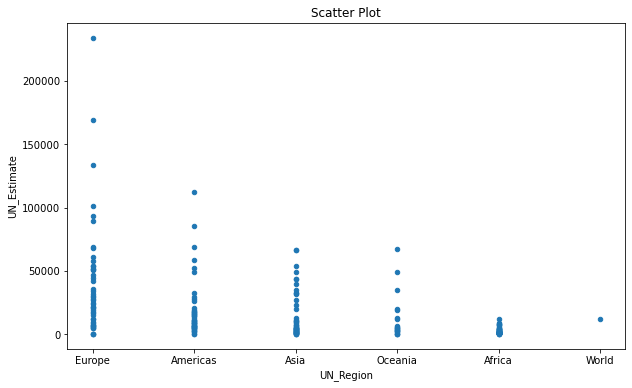

In [91]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

In [177]:
df[(df["UN_Region"]=="Africa") & (df["UN_Estimate"]>10000)]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
74,Seychelles,Africa,19536,2023,14653,2021,12085,2021


### Boxplot and Outliers

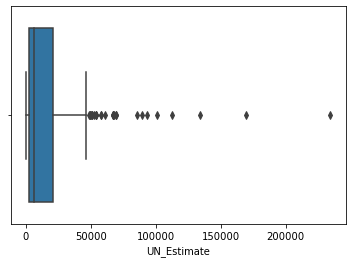

In [93]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [95]:
df[df["UN_Estimate"]>50000].head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


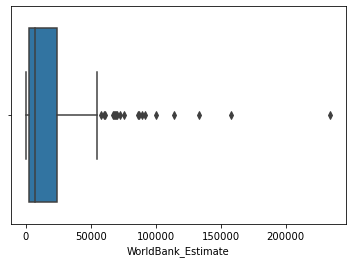

In [97]:
sns.boxplot(x=df["WorldBank_Estimate"])

plt.show()

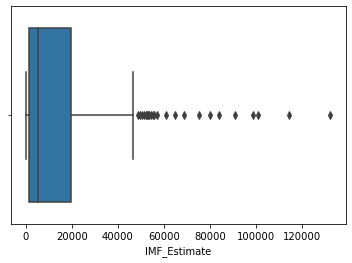

In [99]:
sns.boxplot(x=df["IMF_Estimate"])

plt.show()

In [101]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [103]:
df.UN_Estimate.mean()

17767.304932735427

In [105]:
df.shape

(223, 8)

## Create another dataframe called data excluding  5 countries with highest UN estimate

In [107]:
data = df[-(df["UN_Estimate"]>100000)]

In [109]:
data.UN_Estimate.mean()

14729.47247706422

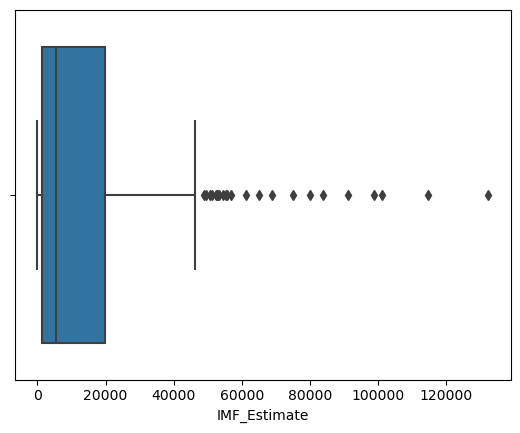

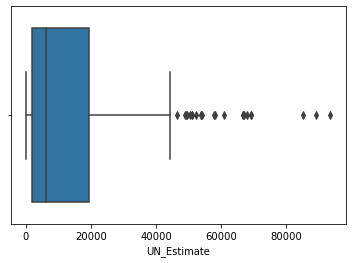

In [111]:
sns.boxplot(x=data["UN_Estimate"])
plt.show()

## Removing outliers

In [113]:
lower_q = df["UN_Estimate"].quantile(0.25)
lower_q


2039.0

In [115]:
higher_q = df["UN_Estimate"].quantile(0.75)
higher_q

20740.0

In [181]:
iqr = higher_q - lower_q

In [185]:
lower_q - 1.5*iqr

-26012.5

In [189]:
higher_q +1.5 *iqr

48791.5

In [195]:
df_filtered = df[(df["UN_Estimate"] > lower_q - 1.5 * iqr ) & (df["UN_Estimate"] < higher_q + 1.5* iqr )]

In [117]:
df_filtered = df[(df["UN_Estimate"] < higher_q) & (df["UN_Estimate"] > lower_q)]

In [197]:
df_filtered.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
9,Isle of Man,Europe,0,0,87158,2019,0,0
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
29,Macau,Asia,50571,2023,43874,2021,43555,2021
30,United Arab Emirates,Asia,49451,2023,44316,2021,43295,2021


In [199]:
df_filtered.shape

(196, 8)

In [123]:
df_filtered.UN_Estimate.mean()

7934.8378378378375

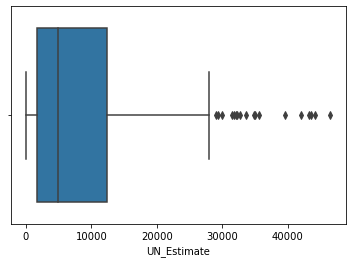

In [201]:
sns.boxplot(x=df_filtered["UN_Estimate"])
plt.show()

In [125]:
#how can we create a table with following 
df_filtered.WorldBank_Estimate.mean()

7555.414414414415

In [127]:
df_filtered.UN_Estimate.mean()


7934.8378378378375

In [129]:
df_filtered.IMF_Estimate.mean()

8276.324324324325